<a href="https://colab.research.google.com/github/michaelfidanza/heart_disease_forecasting/blob/colab/heart_disease_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart disease analysis

##Importing libraries and dataset

In [1]:
# import libraries and functions
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# connect to gdrive account to retrieve the csv file
drive.mount('/content/gdrive')
heart_disease_df = pd.read_csv('gdrive/MyDrive/data_sets/heart_2020_cleaned.csv')

Mounted at /content/gdrive


## Normalizing column names

In [3]:
heart_disease_df.columns = heart_disease_df.columns.map(lambda x : x.lower())
heart_disease_df.columns

Index(['heartdisease', 'bmi', 'smoking', 'alcoholdrinking', 'stroke',
       'physicalhealth', 'mentalhealth', 'diffwalking', 'sex', 'agecategory',
       'race', 'diabetic', 'physicalactivity', 'genhealth', 'sleeptime',
       'asthma', 'kidneydisease', 'skincancer'],
      dtype='object')

## Initial exploration

As we can see there aren't NULL values, probably already cleaned. Anyway there are a lot of features which are not represented as numbers

In [4]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   heartdisease      319795 non-null  object 
 1   bmi               319795 non-null  float64
 2   smoking           319795 non-null  object 
 3   alcoholdrinking   319795 non-null  object 
 4   stroke            319795 non-null  object 
 5   physicalhealth    319795 non-null  float64
 6   mentalhealth      319795 non-null  float64
 7   diffwalking       319795 non-null  object 
 8   sex               319795 non-null  object 
 9   agecategory       319795 non-null  object 
 10  race              319795 non-null  object 
 11  diabetic          319795 non-null  object 
 12  physicalactivity  319795 non-null  object 
 13  genhealth         319795 non-null  object 
 14  sleeptime         319795 non-null  float64
 15  asthma            319795 non-null  object 
 16  kidneydisease     31

We can notice that there are some outliers and some strange values that we could investigate later (e.g. sleeptime = 1 or = 24)

In [5]:
# heart_disease_df.describe(include='all').T
heart_disease_df.describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
physicalhealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
mentalhealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
sleeptime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


### Let's see the unique values of the features which are not numbers

In [6]:
# apply a mask to retrieve all non numeric columns
columns_to_encode_list = heart_disease_df.dtypes[(heart_disease_df.dtypes != 'float64')].index.tolist()
columns_to_encode_list

['heartdisease',
 'smoking',
 'alcoholdrinking',
 'stroke',
 'diffwalking',
 'sex',
 'agecategory',
 'race',
 'diabetic',
 'physicalactivity',
 'genhealth',
 'asthma',
 'kidneydisease',
 'skincancer']

In [7]:
# check the unique values for the features
# most of them are of the type "Yes" or "No"
for col in columns_to_encode_list:
  print(col, '(',len(heart_disease_df[col].unique()) , '):\n',heart_disease_df[col].unique(),'\n')

heartdisease ( 2 ):
 ['No' 'Yes'] 

smoking ( 2 ):
 ['Yes' 'No'] 

alcoholdrinking ( 2 ):
 ['No' 'Yes'] 

stroke ( 2 ):
 ['No' 'Yes'] 

diffwalking ( 2 ):
 ['No' 'Yes'] 

sex ( 2 ):
 ['Female' 'Male'] 

agecategory ( 13 ):
 ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

race ( 6 ):
 ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

diabetic ( 4 ):
 ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

physicalactivity ( 2 ):
 ['Yes' 'No'] 

genhealth ( 5 ):
 ['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

asthma ( 2 ):
 ['Yes' 'No'] 

kidneydisease ( 2 ):
 ['No' 'Yes'] 

skincancer ( 2 ):
 ['Yes' 'No'] 



### Encode categorical values with numbers

In [8]:
# we use a function from sklearn to encode automatically the columns
# we could have mapped to a dictionary every single columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

heart_disease_df_encoded = heart_disease_df.copy()

for col in columns_to_encode_list:
  heart_disease_df_encoded[col] = le.fit_transform(heart_disease_df_encoded[col])

In [9]:
# check new values for the columns
for col in columns_to_encode_list:
  print(col, '(',len(heart_disease_df_encoded[col].unique()) , '):\n',heart_disease_df_encoded[col].unique(),'\n')

heartdisease ( 2 ):
 [0 1] 

smoking ( 2 ):
 [1 0] 

alcoholdrinking ( 2 ):
 [0 1] 

stroke ( 2 ):
 [0 1] 

diffwalking ( 2 ):
 [0 1] 

sex ( 2 ):
 [0 1] 

agecategory ( 13 ):
 [ 7 12  9 11  4 10  8  6  5  0  3  2  1] 

race ( 6 ):
 [5 2 1 0 4 3] 

diabetic ( 4 ):
 [2 0 1 3] 

physicalactivity ( 2 ):
 [1 0] 

genhealth ( 5 ):
 [4 1 2 3 0] 

asthma ( 2 ):
 [1 0] 

kidneydisease ( 2 ):
 [0 1] 

skincancer ( 2 ):
 [1 0] 



### Try to get some insights about data

There is no strong correlation between single variables.
We can see that heart disease has the strongest positive correlation with alcoholdrinking, physicalhealth, diffwalking, agecategory, diabetic and kidneydisease, but in any case they're weak correlation ~ 20 %

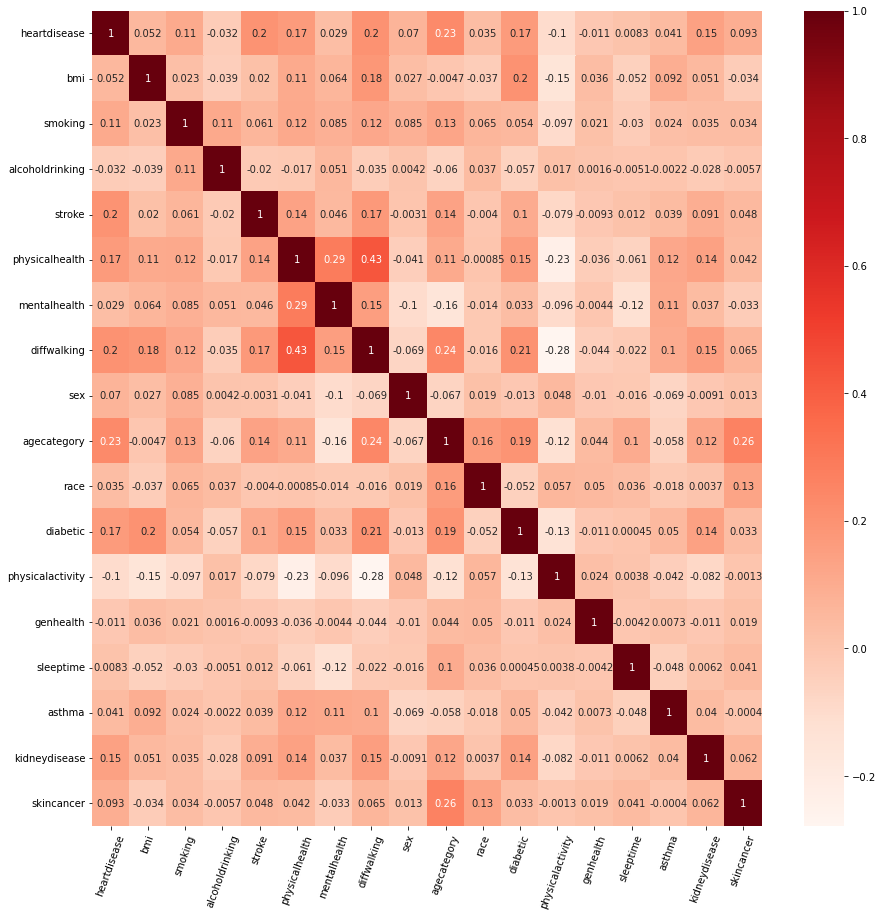

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(heart_disease_df_encoded.corr(), annot=True, cmap='Reds')
plt.xticks(rotation=70)
plt.show()

By looking at the proportions between people who had/have heart disease and those who don't, we notice that the dataset is unbalanced, and this will be a problem later when applying ML algorithms

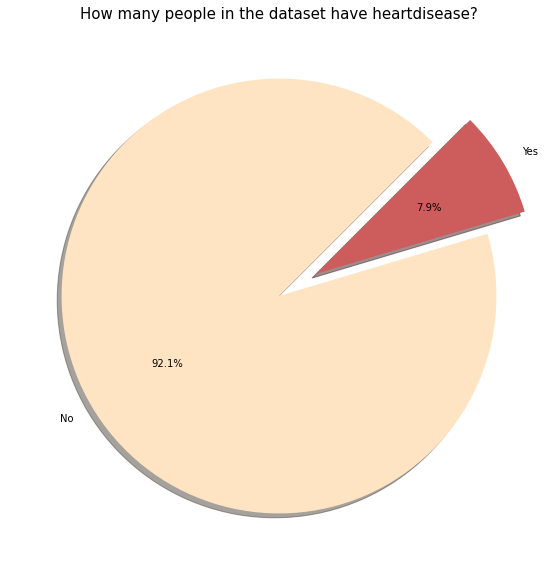

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(
    [len(heart_disease_df_encoded['heartdisease'] - sum(heart_disease_df_encoded['heartdisease'])),
     sum(heart_disease_df_encoded['heartdisease'])]
    ,labels=("No", "Yes")
    ,explode=(0, 0.2)
    ,startangle=45
    ,autopct='%1.1f%%'
    ,shadow=True
    ,colors=['bisque', 'indianred']
    )
plt.title("How many people in the dataset have heartdisease?", fontsize=15)
plt.show()

Let's see graphically if some variables are related to BMI

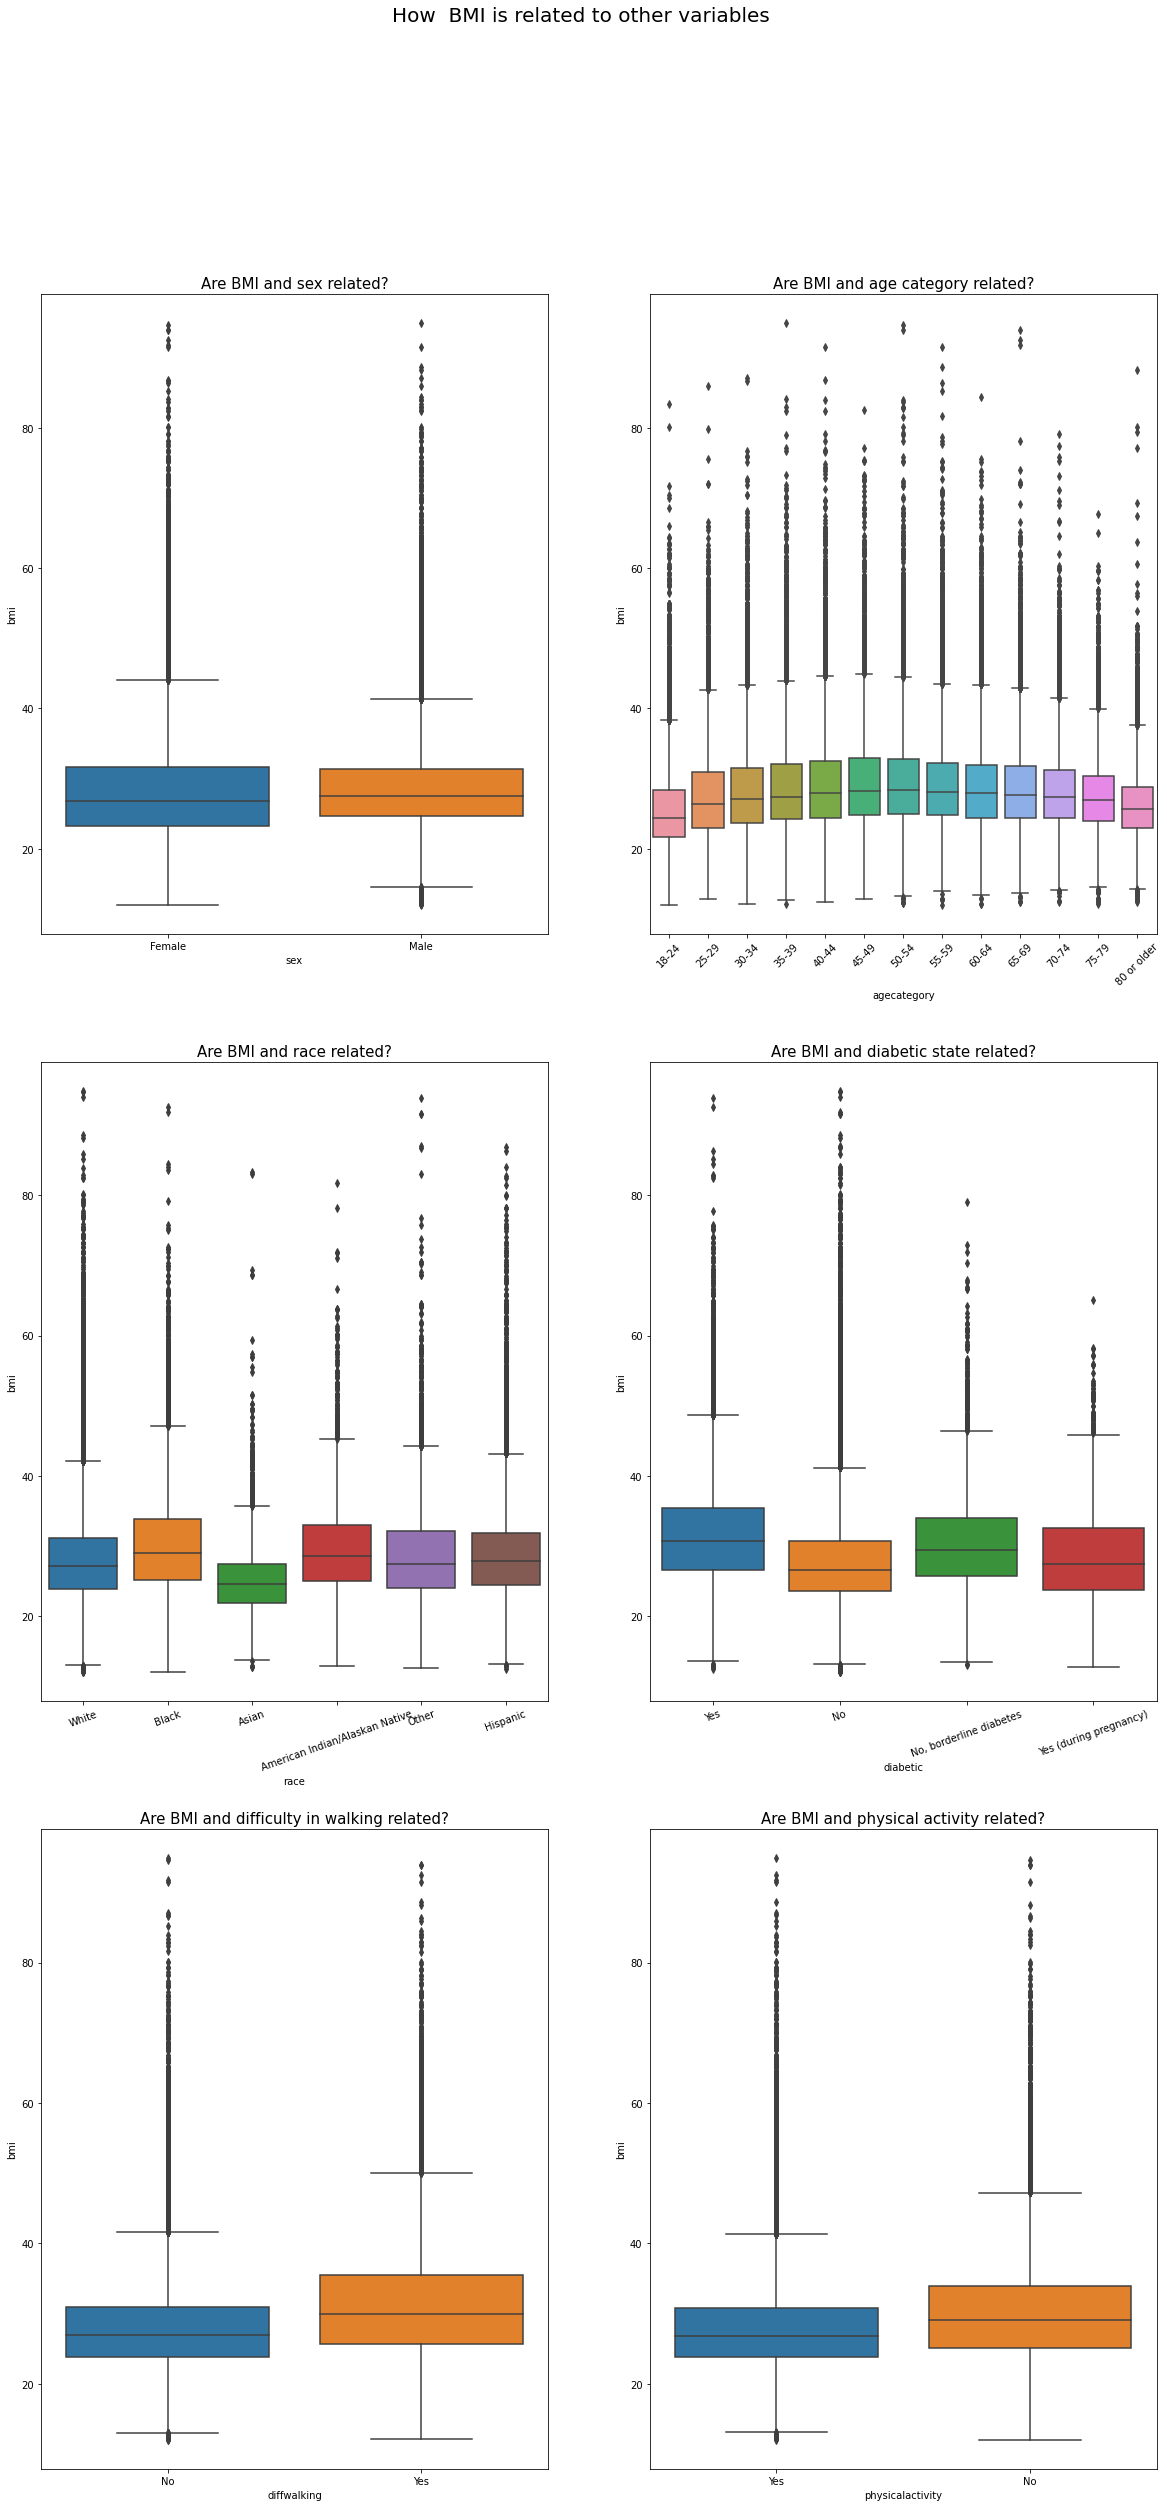

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(20, 40))

# order a copy of the dataframe to have a better graph
heart_disease_df_sorted = heart_disease_df.sort_values(by='agecategory')

sns.boxplot(
    x = 'sex'
    ,y = 'bmi'
    ,data = heart_disease_df
    ,ax=ax[0,0]
)

sns.boxplot(
    x = 'agecategory'
    ,y = 'bmi'
    ,data = heart_disease_df_sorted
    ,ax=ax[0,1]
)



sns.boxplot(
    x = 'race'
    ,y = 'bmi'
    ,data = heart_disease_df
    ,ax=ax[1,0]
)


sns.boxplot(
    x = 'diabetic'
    ,y = 'bmi'
    ,data = heart_disease_df
    ,ax=ax[1,1]
)

sns.boxplot(
    x = 'diffwalking'
    ,y = 'bmi'
    ,data = heart_disease_df
    ,ax=ax[2,0]
)

sns.boxplot(
    x = 'physicalactivity'
    ,y = 'bmi'
    ,data = heart_disease_df
    ,ax=ax[2,1]
)

ax[0,1].tick_params(axis='x', rotation=45)
ax[1,0].tick_params(axis='x', rotation=20)
ax[1,1].tick_params(axis='x', rotation=20)
ax[0,0].set_title('Are BMI and sex related?', fontsize=15)
ax[0,1].set_title('Are BMI and age category related?', fontsize=15)
ax[1,0].set_title('Are BMI and race related?', fontsize=15)
ax[1,1].set_title('Are BMI and diabetic state related?', fontsize=15)
ax[2,0].set_title('Are BMI and difficulty in walking related?', fontsize=15)
ax[2,1].set_title('Are BMI and physical activity related?', fontsize=15)

fig.suptitle('How  BMI is related to other variables', fontsize=20)
plt.show()

Let's see how diabetes is influenced by age

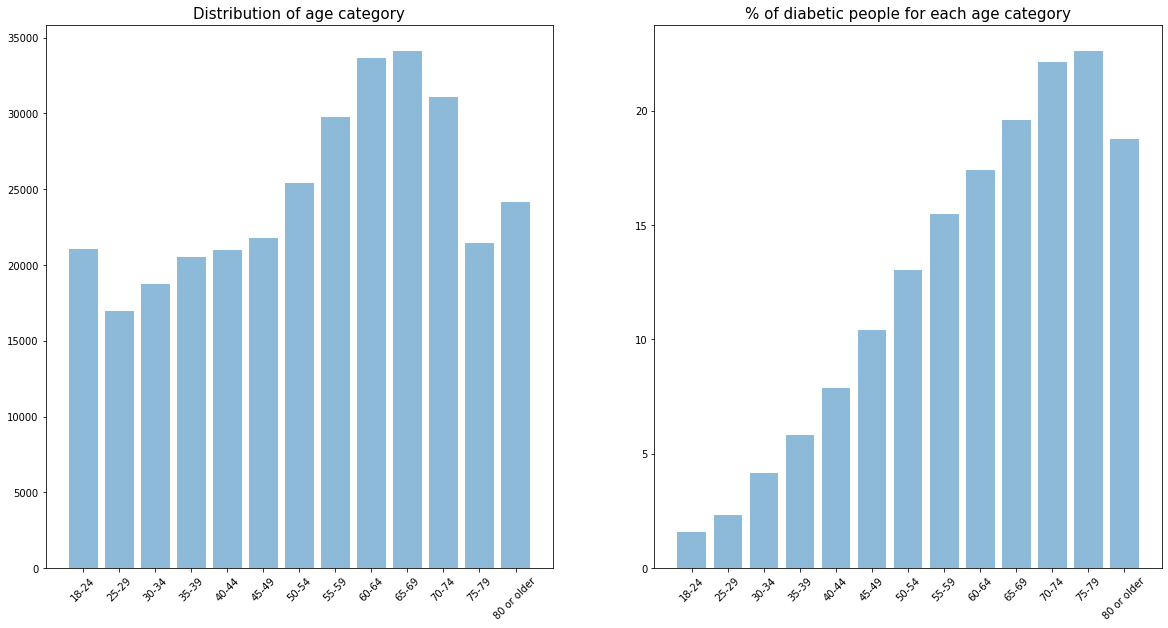

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

# print((heart_disease_df_sorted['agecategory'].unique()))

# print(len(heart_disease_df_sorted.agecategory[heart_disease_df_sorted.agecategory=='18-24']))
# print(len(heart_disease_df_sorted.agecategory[heart_disease_df_sorted.agecategory=='25-29']))
# print(
#     len(heart_disease_df_sorted.agecategory[(heart_disease_df_sorted.agecategory=='25-29') & (heart_disease_df_sorted.diabetic!='No')])
#     / len(heart_disease_df_sorted.agecategory[heart_disease_df_sorted.agecategory=='25-29'])
#     * 100
#     )
heart_disease_df_sorted = heart_disease_df.sort_values(by='agecategory')

heart_disease_df_sorted['diabetic'] = heart_disease_df_sorted['diabetic'].map({'Yes' : 1, 'No' : 0, 'Yes (during pregnancy)' : 1, 'No, borderline diabetes' : 0})

diabetic_statistics = heart_disease_df_sorted.groupby('agecategory')['diabetic'].aggregate([sum, 'count'])

diabetic_statistics['percentage'] = diabetic_statistics['sum'] / diabetic_statistics['count'] * 100



# sns.histplot(
#     heart_disease_df_sorted['agecategory']
#     ,ax=ax[0]
#     )

# sns.histplot(
#     x = diabetic_statistics.index.tolist()
#     ,y = 'percentage'
#     ,data=diabetic_statistics
#     ,ax=ax[1]
#     ,bins=13
#     )
ax[0].bar(diabetic_statistics.index, diabetic_statistics['count'], align='center', alpha=0.5)
ax[1].bar(diabetic_statistics.index, diabetic_statistics['percentage'], align='center', alpha=0.5)

ax[0].set_title('Distribution of age category', fontsize=15)
ax[1].set_title('% of diabetic people for each age category', fontsize=15)

ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)

plt.show()

Let's see how to handle outliers

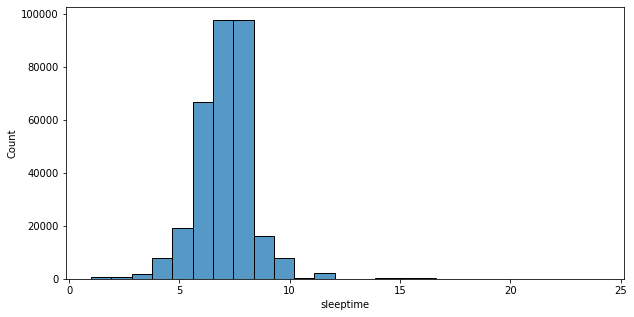



1.0       551
2.0       788
3.0      1992
4.0      7750
5.0     19184
6.0     66721
7.0     97751
8.0     97602
9.0     16041
10.0     7796
11.0      415
12.0     2205
13.0       97
14.0      243
15.0      189
16.0      236
17.0       21
18.0      102
19.0        3
20.0       64
21.0        2
22.0        9
23.0        3
24.0       30
Name: sleeptime, dtype: int64


Average sleep time is 7.097074688472302 while variance is 2.0621162791467267


In [36]:
fig = plt.figure(figsize=(10, 5))
sns.histplot(heart_disease_df.sleeptime, bins=25)
plt.show()

print('\n')
print(heart_disease_df.sleeptime.value_counts().sort_index())
print('\n')
print('Average sleep time is', heart_disease_df.sleeptime.mean(), 'while variance is', heart_disease_df.sleeptime.var())

##Machine learning

### Importing libraries

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from collections import Counter

###Predicting using whole dataset and applying directly the classifier model

####Decide what features to use

In [72]:
#first decide the variable to predict and the predictors and assign them to separate variables 
y = heart_disease_df_encoded.heartdisease
x = heart_disease_df_encoded.drop('heartdisease', axis=1)

####Undersampling


In [73]:
print(y.value_counts())

#instantiate the undersampler
rus = RandomUnderSampler()
#resampling
x_rus, y_rus = rus.fit_resample(x, y)

print(y_rus.value_counts())

0    292422
1     27373
Name: heartdisease, dtype: int64
0    27373
1    27373
Name: heartdisease, dtype: int64


####Random Forest Classifier

In [74]:
#decide the model to be used
model = RandomForestClassifier(random_state=42)

#split the dataset into train/test data using a library function
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

#train the model on the train data
model.fit(x_train, y_train)

#predict y values using x_test and the compare with the real y_test values to see the accuracy
#of the prediction
y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.7420091324200914


####Decision Tree Classifier

In [63]:
#decide the model to be used
model = DecisionTreeClassifier(random_state=42)

#split the dataset into train/test data using a library function
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

#train the model on the train data
model.fit(x_train, y_train)

#predict y values using x_test and the compare with the real y_test values to see the accuracy
#of the prediction
y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.6749771689497717


####Gaussian Naive Bayes

In [64]:
#decide the model to be used
model = GaussianNB()

#split the dataset into train/test data using a library function
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

#train the model on the train data
model.fit(x_train, y_train)

#predict y values using x_test and the compare with the real y_test values to see the accuracy
#of the prediction
y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.7094977168949772


###Predicting using only some columns of the dataset and applying directly the classifier model

####Decide what features to use

In [83]:
y = heart_disease_df_encoded.heartdisease
x = heart_disease_df_encoded.drop(['heartdisease', 'mentalhealth', 'race', 'genhealth', 'sleeptime'], axis=1)

####Undersampling

In [76]:
#instantiate the undersampler
rus = RandomUnderSampler()
#resampling
x_rus, y_rus = rus.fit_resample(x, y)

print(y_rus.value_counts())

0    27373
1    27373
Name: heartdisease, dtype: int64


####Oversampling

In [85]:
#instantiate the undersampler
ros = RandomOverSampler()
#resampling
x_ros, y_ros = ros.fit_resample(x, y)

print(y_ros.value_counts())

0    292422
1    292422
Name: heartdisease, dtype: int64


####Random Forest Classifier

In [86]:
#decide the model to be used
model = RandomForestClassifier(random_state=42)

#split the dataset into train/test data using a library function
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)

#train the model on the train data
model.fit(x_train, y_train)

#predict y values using x_test and the compare with the real y_test values to see the accuracy
#of the prediction
y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.9258179517649976


####Decision Tree Classifier

In [88]:
#decide the model to be used
model = DecisionTreeClassifier(random_state=42)

#split the dataset into train/test data using a library function
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)

#train the model on the train data
model.fit(x_train, y_train)

#predict y values using x_test and the compare with the real y_test values to see the accuracy
#of the prediction
y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.9231847754533252


####Gaussian Naive Bayes

In [90]:
#decide the model to be used
model = GaussianNB()

#split the dataset into train/test data using a library function
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)

#train the model on the train data
model.fit(x_train, y_train)

#predict y values using x_test and the compare with the real y_test values to see the accuracy
#of the prediction
y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.7024681753285058
